<a href="https://colab.research.google.com/github/linyu3294/cs6220-data-minning-hw/blob/main/cs6220_hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **HW2**
---


## **Problem 1 : KMeans Theory**

Given Kmeans Objective discussed in class with Euclidian distance 


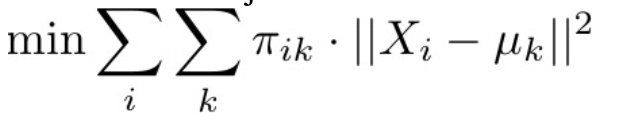



---

### **Section A**

prove that E step update on membership ($\pi$) achieves the minimum objective given the current centroids($\mu$) 




Proof By Contradiction:

Claim: 

  E step update on membership ( 𝜋 ) DOES NOT achieve the minimum objective given the current centroids( 𝜇 ). 
  

Proof:

  If E step update on membership ( 𝜋_k ) DOES NOT achieve the minimum objective given the current centroids( 𝜇_k ), then it means the objective is staying the same or increasing. Alternatively, We can update the membership such that the datapoints causing the objective to higher than minimal are moved to some other cluster (𝜇_j). 
  
  Following the above logic, all datapoints can be paired with the closest 𝜇, since each cluster is isolated and independent from any other cluster. Therefore a cluster that's not the minimum objective cannot exist for any iteration.


  
  


---

### **Section B**


prove that M step update on centroids ($\mu$) achieves the minimum objective given the current memberships($\pi$) 



O = objective function

 $$O\ = \sum_{i}\sum_{k}\,\pi_{i_k} \cdot \ (\parallel X_i - \mu_k \parallel)^2$$

$$\frac{\partial \ O}{\partial \mu_k} = \frac{\partial \ (\ \sum_{i}\sum_{k}\,\pi_{i_k} \cdot \ (\parallel X_i - \mu_k \parallel)^2\ )}{\partial \mu_k}$$



$$\frac{\partial \ O}{\partial \mu_k} = \ (\ - 2\  \cdot \ \sum_{i}\,\pi_{i_k} \cdot \ ( X_i - \mu_k )\ )$$

$$ 0 = -2\  \cdot \ \sum_{i}\,\pi_{i_k} \cdot \ (X_i - \mu_k )\ $$

$$ 0 = 2\  \cdot \ \sum_{i}\,\ (\pi_{i_k} \cdot \ X_i) - (\pi_{i_k} \cdot \mu_k) \ $$

$$ 0 = 2\sum_{i}(\pi_{i_k} \cdot \ X_i) - 2 \sum_{i}(\pi_{i_k} \cdot \mu_k) \ $$

$$ 2 \sum_{i}(\pi_{i_k} \cdot \mu_k) =  2\sum_{i}(\pi_{i_k} \cdot \ X_i)$$

$$ \mu_k = \frac{2\sum_{i}(\pi_{i_k} \cdot \ X_i)}{2 \sum_{i}(\pi_{i_k} )}$$

$$ \mu_k = \frac{\sum_{i}(\pi_{i_k} \cdot \ X_i)}{\sum_{i}(\pi_{i_k} )}$$



Proof: 

---

### **Section C**

Explain why KMeans has to stop (converge), but not necessarily to the global minimum objective value.



This is because Kmeans is not necessarily a convex funtion. 

There can be many local minimums along the function curve. 

When Kmean randomly initialize the mu or the pi, it is not guaranteed that it's initialized adjacent to the globabl minimum. 

And since Kmeans can only go down the curve, it's not gauranteed that the curve will reach to the global minimum



Explaination:

---


## **PROBLEM 2 : KMeans on data**

Using Euclidian distance or dot product similarity (choose one per dataset, you can try other similarity metrics)

A) run KMeans on the MNIST Dataset, try K=10

B) run KMeans on the FASHION Dataset, try K=10

C) run KMeans on the 20NG Dataset, try K=20

---


---
### **KMeans Implementation**

 Run KMeans on the MNIST Dataset, try K=10

In [ ]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from sklearn.preprocessing import normalize

In [ ]:
from sklearn.metrics import pairwise_distances_argmin_min 
# This function computes for each row in X, the index of the row of Y which is closest
#
# Returns
#
#   argmin : ndarray
#   Y[argmin[i], :] is the row in Y that is closest to X[i, :].
#
#   distances : ndarray
#   distances[i] is the distance between the i-th row in X and the argmin[i]-th row in Y.

---
Initiate random centoids

In [ ]:
import random
k = 0
train_data = []

def init_rand_centoids(csr_matrix: train_data, int: k) -> dict :
  centoid_dict = {}
  for draft in range(k):
    seed = random.randint(0,len(train_data)-1)
    centoid_dict[draft] = train_data[seed]
  return centoid_dict

---
E Step - Assign clusters to centoids

In [ ]:
centoid_dict = {}
train_data = []
def assign_cluster(csr_matrix: train_data,  dict: centoid_dict) -> [dict, list]:
  centoid_lst = []
  for centoid in centoid_dict.values():
    centoid_lst.append(centoid)
  centoid_nd_array = np.array(centoid_lst)
  cluster_tuple = pairwise_distances_argmin_min(train_data, centoid_nd_array)  
  
  clt = list(cluster_tuple[0])
  dstances =  list(cluster_tuple[1])
  cluster_dict = {}
  for ele in enumerate(clt):
    # print(ele[0])
    if not cluster_dict.get(ele[1]):
      cluster_dict[ele[1]] = []
    cluster_dict.get(ele[1]).append(ele[0])
    # print(cluster_dict[ele[1]])
  return [cluster_dict, dstances]

---
M Step - Get centoids that belong to each cluster

In [ ]:
train_data =[]
cluster_dict = {}

def tune_centroid (csr_matrix: train_data, dict: cluster_dict) -> dict:
  centoid_dict = {}
  train_data.shape

  for cluster_key in cluster_dict.keys() :
    train_indices = cluster_dict.get(cluster_key)
    cluster_imgs = []

    for train_index in train_indices:
      cluster_imgs.append(train_data[train_index])
    centoid_dict[cluster_key] = np.sum(cluster_imgs, axis=0) / len(train_indices)

  return centoid_dict

In [ ]:
cluster_dict = {}
train_label = []
gini_dict = {}

def evaluate_result (dict: cluster_dict, ndarray: train_label) :
  purity_sum = 0

  # for key, val in cluster_dict.items():
  #   print('cluster_key : ', key , '  | \n cluster val :' , val)

  for c_key in cluster_dict.keys():
    c_lst = cluster_dict[c_key]
    label_lst = []
    for c_id in c_lst:
      label_lst.append(train_label[c_id])
      
    gini = 0 
    for label in label_lst:
      gini = gini +  ( ( label_lst.count(label) / len(label_lst) ) ** 2 )
    
    gini_dict [c_key] = 1-gini

    most_freequent_label = max(set(label_lst), key = label_lst.count) 
    c_count = label_lst.count(most_freequent_label)
    
    # print('For cluster : ', c_key ,  ' | the most freequent label is : ', most_freequent_label, '| it appears : ', c_count)
    purity_sum += c_count

  # print('\n\n')
  # for key, val in gini_dict.items():
  #   print('Gini coefficient for cluster : ', key , '  | val :' , val)

  purity = purity_sum / len(train_label)
  print('Overall purity score is ', purity)
 

---
### **Section A**

 Run KMeans on the MNIST Dataset, try K= 5, 10, 20

In [ ]:
from keras.datasets import mnist 

# load mnist data
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

# reshape and normalize
train_data = np.reshape(train_data, (60000, 784)) 
train_data = normalize(train_data, norm ='max')
test_data = np.reshape(test_data, (10000, 784))
test_data = normalize(test_data, norm ='max') 

# print(type(train_data))
train_data = np.concatenate([train_data, test_data])
train_label = np.concatenate([train_labels, test_labels])
print(train_data.shape)
print(train_label.shape)


(70000, 784)
(70000,)


In [ ]:
k = 5

# define number of clusters
centoid_dict = init_rand_centoids(train_data, k)

# Run E and M steps to converge at local minimum
distances = []
updated_objective = 0
objective = 0
for j in range(200):
  assign_cluster_result = assign_cluster(train_data, centoid_dict)
  cluster_dict = assign_cluster_result[0]
  updated_objective = np.matrix(assign_cluster_result[1])

  updated_objective = updated_objective.sum()
  
  centoid_dict = tune_centroid (train_data, cluster_dict)
  if (updated_objective == objective) : break
  else: objective = updated_objective
  # for key, val in cluster_dict.items():
  #   print('centoid_dict : ', key , '  | val :' , len(val) )
  # print(objective)
  


print('Objective after convergence : ', objective)
evaluate_result(cluster_dict, train_data)



Objective after convergence :  455780.8507923226
Overall purity score is  0.4525142857142857


In [ ]:
k = 10
# define number of clusters
centoid_dict = init_rand_centoids(train_data, k)

# Run E and M steps to converge at local minimum
distances = []
updated_objective = 0
objective = 0
for j in range(200):
  assign_cluster_result = assign_cluster(train_data, centoid_dict)
  cluster_dict = assign_cluster_result[0]
  updated_objective = np.matrix(assign_cluster_result[1]).sum()
  centoid_dict = tune_centroid (train_data, cluster_dict)
  if (updated_objective == objective) : break
  else: objective = updated_objective

print('Objective after convergence : ', objective)
evaluate_result(cluster_dict, train_data)

Objective after convergence :  431421.1052365949
Overall purity score is  0.5914428571428572


In [ ]:
k = 20
# define number of clusters
centoid_dict = init_rand_centoids(train_data, k)

# Run E and M steps to converge at local minimum
distances = []
updated_objective = 0
objective = 0
for j in range(200):
  assign_cluster_result = assign_cluster(train_data, centoid_dict)
  cluster_dict = assign_cluster_result[0]
  updated_objective = np.matrix(assign_cluster_result[1]).sum()
  centoid_dict = tune_centroid (train_data, cluster_dict)
  if (updated_objective == objective) : break
  else: objective = updated_objective

print('Objective after convergence : ', objective)
evaluate_result(cluster_dict, train_data)

Objective after convergence :  408501.15270304866
Overall purity score is  0.6864857142857143


---
### **Section B**

Run KMeans on the 20NG Dataset, try K=5, 10, 20

In [ ]:
from keras.datasets import fashion_mnist as fashion

# load fashion data
(train_data, train_labels) , (test_data, test_labels)= fashion.load_data()

# reshape and normalize
train_data = np.reshape(train_data, (60000, 784)) 
train_data = normalize(train_data, norm ='max')
test_data = np.reshape(test_data, (10000, 784))
test_data = normalize(test_data, norm ='max') 

# print(type(train_data))
train_data = np.concatenate([train_data, test_data])
train_label = np.concatenate([train_labels, test_labels])
print(train_data.shape)
print(train_label.shape)

(70000, 784)
(70000,)


In [ ]:
# define number of clusters
k = 5

# define number of clusters
centoid_dict = init_rand_centoids(train_data, k)

# Run E and M steps to converge at local minimum
distances = []
updated_objective = 0
objective = 0
for j in range(200):
  assign_cluster_result = assign_cluster(train_data, centoid_dict)
  cluster_dict = assign_cluster_result[0]
  updated_objective = np.matrix(assign_cluster_result[1]).sum()
  centoid_dict = tune_centroid (train_data, cluster_dict)
  if (updated_objective == objective) : break
  else: objective = updated_objective

print('Objective after convergence : ', objective)
evaluate_result(cluster_dict, train_data)

Objective after convergence :  427131.97371443675
Overall purity score is  0.4111142857142857


In [ ]:
# define number of clusters
k = 10

# define number of clusters
centoid_dict = init_rand_centoids(train_data, k)

# Run E and M steps to converge at local minimum
distances = []
updated_objective = 0
objective = 0
for j in range(200):
  assign_cluster_result = assign_cluster(train_data, centoid_dict)
  cluster_dict = assign_cluster_result[0]
  updated_objective = np.matrix(assign_cluster_result[1]).sum()
  centoid_dict = tune_centroid (train_data, cluster_dict)
  if (updated_objective == objective) : break
  else: objective = updated_objective

print('Objective after convergence : ', objective)
evaluate_result(cluster_dict, train_data)

Objective after convergence :  385887.9392602545
Overall purity score is  0.5555


In [ ]:
# define number of clusters
k = 20

# define number of clusters
centoid_dict = init_rand_centoids(train_data, k)

# Run E and M steps to converge at local minimum
distances = []
updated_objective = 0
objective = 0
for j in range(200):
  assign_cluster_result = assign_cluster(train_data, centoid_dict)
  cluster_dict = assign_cluster_result[0]
  updated_objective = np.matrix(assign_cluster_result[1]).sum()
  centoid_dict = tune_centroid (train_data, cluster_dict)
  if (updated_objective == objective) : break
  else: objective = updated_objective

print('Objective after convergence : ', objective)
evaluate_result(cluster_dict, train_data)

Objective after convergence :  352225.0204633969
Overall purity score is  0.6570142857142857


---
### **Section C**

Run KMeans on the 20NG Dataset, try K=5, 10, 20


Import Training Data and normalize 

In [ ]:
from sklearn.datasets import fetch_20newsgroups 
from sklearn.feature_extraction.text import TfidfVectorizer

# same normalization parameters just transform 
train_set = fetch_20newsgroups(subset='train')
train_data = train_set.data
train_label = train_set.target
test_set = fetch_20newsgroups(subset='test')
test_data = test_set.data
test_label = test_set.target


# normalize data
vectorizer = TfidfVectorizer()
train_data = vectorizer.fit_transform(train_data)
train_data = np.array(train_data.todense())

In [ ]:
k = 5
# define number of clusters
centoid_dict = init_rand_centoids(train_data, k)

# Run E and M steps to converge at local minimum
distances = []
updated_objective = 0
objective = 0
for j in range(200):
  assign_cluster_result = assign_cluster(train_data, centoid_dict)
  cluster_dict = assign_cluster_result[0]
  updated_objective = np.matrix(assign_cluster_result[1]).sum()
  centoid_dict = tune_centroid (train_data, cluster_dict)
  if (updated_objective == objective) : break
  else: objective = updated_objective

print('Objective after convergence : ', objective)
evaluate_result(cluster_dict, train_data)

Objective after convergence :  10940.460892907273
Overall purity score is  0.11879087855753934


In [ ]:
k = 10
cycles = 200
# define number of clusters
centoid_dict = init_rand_centoids(train_data, k)

# Run E and M steps to converge at local minimum
distances = []
updated_objective = 0
objective = 0
for j in range(200):
  assign_cluster_result = assign_cluster(train_data, centoid_dict)
  cluster_dict = assign_cluster_result[0]
  updated_objective = np.matrix(assign_cluster_result[1]).sum()
  centoid_dict = tune_centroid (train_data, cluster_dict)
  if (updated_objective == objective) : break
  else: objective = updated_objective

print('Objective after convergence : ', objective)
evaluate_result(cluster_dict, train_data)

Objective after convergence :  10914.3719406593
Overall purity score is  0.20328796181721762


In [ ]:
k = 20
cycles = 200
# define number of clusters
centoid_dict = init_rand_centoids(train_data, k)

# Run E and M steps to converge at local minimum
distances = []
updated_objective = 0
objective = 0
for j in range(200):
  assign_cluster_result = assign_cluster(train_data, centoid_dict)
  cluster_dict = assign_cluster_result[0]
  updated_objective = np.matrix(assign_cluster_result[1]).sum()
  centoid_dict = tune_centroid (train_data, cluster_dict)
  if (updated_objective == objective) : break
  else: objective = updated_objective

print('Objective after convergence : ', objective)
evaluate_result(cluster_dict, train_data)

Objective after convergence :  10864.185345808055
Overall purity score is  0.2674562488951741



---
## PROBLEM 3 : Gaussian Mixture on toy data

You are required to implemet the main EM loop, but can use math API/functions provided by your language to calculate normal densities, covariance matrix, etc.

---



### **Guassian Mixture Implementation**


In [ ]:
import numpy as np
from scipy.special import logsumexp
from scipy.stats import multivariate_normal
from sklearn.cluster import KMeans

In [ ]:

def parse_data (infile) -> np.array :
  max_news_index = 0;

  try:
    infile = open(infile, "r")
    all_data = infile.read()
    lines = all_data.splitlines()

    X = []
    for line in lines:
      if line:
        datapoint_vector = [float(line.split(' ')[0]), float(line.split(' ')[1])]
        X.append(datapoint_vector)

  except:
    print('Oops there is an error when opening your file. ',
          'Make sure you the file exists in path!')

  return np.array(X)


---

$$
\large
p(\mathbf x | \mathbf\mu, \mathbf\Sigma) = \frac 1 {({2\pi})^{n/2}|\Sigma|^{1/2}}\exp\left(-\frac 1 2 (\mathbf x -\mathbf\mu)^T\mathbf\Sigma^{-1}(\mathbf x -\mathbf\mu)\right)
$$

1. The exponent part in the parenthesis evaluates to a number

2. mu is a dx1 vector

3. covariance is a dxd matrix

In [ ]:

def gaussian(X, mu, cov) -> np.array:
    n = X.shape[1]
    diff = (X - mu).T

    base = 1 / ((2 * np.pi) ** (n / 2) * np.linalg.det(cov) ** 0.5)
    expo_val = -0.5 * np.dot(np.dot(diff.T, np.linalg.inv(cov)), diff)
    expo = np.exp(expo_val)

    return np.diagonal( base *  expo).reshape(-1, 1)
  

In [ ]:

# def initialize_clusters(X, X_partition, mu ,cov, k) -> ndarray:
def initialize_clusters(X) -> np.array:
    clusters = []
    idx = np.arange(X.shape[0])
    
    # We could use the KMeans centroids to initialise the GMM
    kmeans = KMeans(k).fit(X)
    mu = kmeans.cluster_centers_
  
    for i in range(k):
        clusters.append({
            'pi': 1.0 / k,
            'mu': mu[i],
            # 'cov_k': cov[i],
            'covariance': np.identity(X.shape[1], dtype=np.float64)
        })        
    return clusters


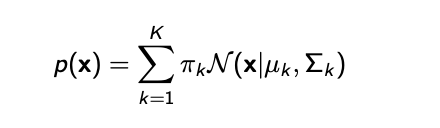

In [ ]:
def run_e_step(X, clusters) -> dict:
    # expectation of datapoint contributing to cluster k
    # the shape of expectation is X by k matrix
    expectation = np.zeros((X.shape[0], 1), dtype=np.float64)    
    
    for cluster in clusters:
        # extracting the parameters for cluster k
        pi = cluster['pi']
        mu = cluster['mu']
        covariance = cluster['covariance']
        
        # pi is the probability of belonging to gussian k (float)
        # pi is different from weight (z) latent variable, in the sense that pi
        # pi does not depend on datapoint, where as weight(z) does
        # See The large annotated equation above
        # each cluster has a guassain that's a vector of len(X)
        # the weight will have the same shape of the guassian for each cluster k
        # the this the first step to calculating the actual weight
        # we need to get the expectation of each data points first
        weight = (pi * gaussian(X, mu, covariance)).astype(np.float64)
        
        # expectation is the sum of the total weights per cluster k
        for i in range(X.shape[0]):
            expectation[i] += weight[i]
        
        cluster['weight'] = weight
        cluster['expectation'] = expectation

    # For each step, the probability of a data point appearing in a cluster
    # is equal to the weight devided the total weighted guassians
    for cluster in clusters:
        cluster['weight'] /= cluster['expectation']

    return cluster
  

$$
\large
N_k=\sum_{n=1}^N\gamma({z_{nk}})
$$

$$
\large
\pi_k^*=\frac {N_k} N
$$

$$
\large
\mu_k^*=\frac 1 {N_k} \sum_{n=1}^N\gamma({z_{nk}})\mathbf x_n
$$
$$
\large
\Sigma_k^*=\frac 1 {N_k} \sum_{n=1}^N\gamma({z_{nk}})(\mathbf x_n-\mathbf\mu_k)(\mathbf x_n-\mathbf\mu_k)^T
$$


𝛾(𝑧𝑛𝑘) = weight

𝑁𝑘 = Norm

𝜋∗𝑘 = new pi

Σ∗𝑘 = new covariance

𝐱𝑛 = data set

𝑁 = len of dataset

In [ ]:

def run_m_step(X, clusters) -> dict:
    # X_len is the number of datapoints, an integer
    X_len = float(X.shape[0])
  
    for cluster in clusters:
        # get the weight for cluster k 
        # the weight k is a vector of length(X)
        weight = cluster['weight']
        # covariance is a matrix of d X d
        covariance = np.zeros((X.shape[1], X.shape[1]))
        
        # find the sum of all weights across all datapoints for cluster k
        # essencially reducing weight, vector of length(X), to one float value per cluster k
        norm = np.sum(weight, axis=0)
      
        # find new probablistic membership, a float value representing each cluster k 
        # different from weight in the sense that pi is membership independent of datapoint
        pi = norm / X_len

        # find new mu
        mu = np.sum(weight * X, axis=0) / norm
        
        # find new covariances
        for i in range(X.shape[0]):
            diff = (X[i] - mu).reshape(-1, 1)
            covariance += weight[i] * np.dot(diff, diff.T)
        covariance /= norm
        
        # repopulate the cluster dictionary with new parameters for cluster k
        cluster['pi'] = pi
        cluster['mu'] = mu
        cluster['covariance'] = covariance

    return clusters


Uses Sum of Log as the estimate instead of log Sum

(Log Sum will blow things up computationally)

In [ ]:
def get_likelihood(X, clusters) -> list:
    # log each expectation that was obtained in step E
    likelihoods = np.log(np.array([cluster['expectation'] for cluster in clusters]))
    # take the sum of the logs
    sum_log_likelihood = np.sum(likelihoods)

    return [sum_log_likelihood, likelihoods]

---
### **Section A**
You are required to implemet the main EM loop, but can use math API/functions provided by your language to calculate normal densities, covariance matrix, etc.

The gaussian 2-dim data on file  2gaussian.txt  has been generated  using a mixture  of  two Gaussians, each  2-dim, with the parameters below. 

Run the EM algorithm with random initial values to recover the parameters.

mean_1 [3,3]); cov_1 = [[1,0],[0,3]]; n1=2000 points

mean_2 =[7,4]; cov_2 = [[1,0.5],[0.5,1]]; ; n2=4000 points


Run The Expectation and Maximization feedback loops to converge Gaussian Mixture

Once the Likelyhood stops changing, we will know that the algorithm has converged.

In [ ]:
infile = '/content/drive/MyDrive/NEU ALIGN CS Masters/CS6220 Data Mining/Colab Notebooks/2gaussian.txt'

k = 2
cycles = 400
X_partition = []
X = parse_data(infile)

clusters = initialize_clusters(X)
likelihoods = np.zeros((cycles, ))

updated_likelihood = 0 
for i in range(cycles):
  run_e_step(X, clusters)
  run_m_step(X, clusters)

  result = get_likelihood(X, clusters)
  likelihood, sample_likelihoods = result[0], result[1]

  if likelihood == updated_likelihood: break
  else: 
    updated_likelihood = likelihood
    print('Cycle: ', i + 1, '  |  Likelihood: ', likelihood)


print('\n')
n=0
clusters
for cluster in clusters:
  n += 1
  print('\nCluster  :  ', n )
  pi =  cluster['pi']
  mu =  cluster['mu'] 
  covariance = cluster['covariance']

  print('pi : ', pi)
  print('mu : ', mu)
  print('covariance : \n', np.array(covariance))

    

Cycle:  1   |  Likelihood:  -45182.546652494464
Cycle:  2   |  Likelihood:  -42165.318432981236
Cycle:  3   |  Likelihood:  -42062.4089298176
Cycle:  4   |  Likelihood:  -42048.29120625378
Cycle:  5   |  Likelihood:  -42042.51968288338
Cycle:  6   |  Likelihood:  -42039.75855252704
Cycle:  7   |  Likelihood:  -42038.4361036902
Cycle:  8   |  Likelihood:  -42037.811622694935
Cycle:  9   |  Likelihood:  -42037.52004845743
Cycle:  10   |  Likelihood:  -42037.38495931928
Cycle:  11   |  Likelihood:  -42037.322694488925
Cycle:  12   |  Likelihood:  -42037.294094913465
Cycle:  13   |  Likelihood:  -42037.280989041814
Cycle:  14   |  Likelihood:  -42037.274992612714
Cycle:  15   |  Likelihood:  -42037.272251910385
Cycle:  16   |  Likelihood:  -42037.27100014608
Cycle:  17   |  Likelihood:  -42037.27042870007
Cycle:  18   |  Likelihood:  -42037.27016791217
Cycle:  19   |  Likelihood:  -42037.270048923674
Cycle:  20   |  Likelihood:  -42037.26999464135
Cycle:  21   |  Likelihood:  -42037.269969

---
### **Section B**


You are required to implemet the main EM loop, but can use math API/functions provided by your language to calculate normal densities, covariance matrix, etc.

Same problem for 2-dim data on file 3gaussian.txt , generated using a mixture of three Gaussians. Verify your  findings against the true parameters used generate the data below.

mean_1 = [3,3] ; cov_1 = [[1,0],[0,3]]; n1=2000

mean_2 = [7,4] ; cov_2 = [[1,0.5],[0.5,1]] ; n2=3000

mean_3 = [5,7] ; cov_3 = [[1,0.2],[0.2,1]]    ); n3=5000


Run The Expectation and Maximization feedback loops to converge Gaussian Mixture

Once the Likelyhood stops changing, we will know that the algorithm has converged.

In [ ]:
infile = '/content/drive/MyDrive/NEU ALIGN CS Masters/CS6220 Data Mining/Colab Notebooks/3gaussian.txt'

k = 3
cycles = 400
X_partition = []
X = parse_data(infile)

clusters = initialize_clusters(X)
likelihoods = np.zeros((cycles, ))

updated_likelihood = 0 
for i in range(cycles):
  run_e_step(X, clusters)
  run_m_step(X, clusters)

  result = get_likelihood(X, clusters)
  likelihood, sample_likelihoods = result[0], result[1]

  if likelihood == updated_likelihood: break
  else: 
    updated_likelihood = likelihood
    print('Cycle: ', i + 1, '  |  Likelihood: ', likelihood)

print('\n')
n=0
clusters
for cluster in clusters:
  n += 1
  print('\nCluster  :  ', n )
  pi =  cluster['pi']
  mu =  cluster['mu'] 
  covariance = cluster['covariance']

  print('pi: ', pi)
  print('mu: ', mu)
  print('covariance : \n', np.array(covariance))

Cycle:  1   |  Likelihood:  -119569.06855202485
Cycle:  2   |  Likelihood:  -114709.50635507489
Cycle:  3   |  Likelihood:  -114460.46533643894
Cycle:  4   |  Likelihood:  -114371.73537856765
Cycle:  5   |  Likelihood:  -114335.90003173833
Cycle:  6   |  Likelihood:  -114320.77522542255
Cycle:  7   |  Likelihood:  -114313.99101712793
Cycle:  8   |  Likelihood:  -114310.68721749191
Cycle:  9   |  Likelihood:  -114308.92005891103
Cycle:  10   |  Likelihood:  -114307.8844437655
Cycle:  11   |  Likelihood:  -114307.22885280356
Cycle:  12   |  Likelihood:  -114306.78886473345
Cycle:  13   |  Likelihood:  -114306.48115142342
Cycle:  14   |  Likelihood:  -114306.25982130076
Cycle:  15   |  Likelihood:  -114306.09757787501
Cycle:  16   |  Likelihood:  -114305.97710143542
Cycle:  17   |  Likelihood:  -114305.88683494841
Cycle:  18   |  Likelihood:  -114305.81877251156
Cycle:  19   |  Likelihood:  -114305.76721557551
Cycle:  20   |  Likelihood:  -114305.72802797443
Cycle:  21   |  Likelihood:  -

---
## **PROBLEM 4 : Gaussian Mixture on real data**




### **Section A**
Run EM to obtain a Gaussian Mixture on FASHION dataset (probably won't work) 

Use a library/package (such as scikit-learn) and at first use the option that imposes a diagonal covariance matrix.

Sampling data might be necessary to complete the run

In [1]:
import pandas as pdaic
import numpy as np
import math
import scipy.stats as stats
from sklearn.mixture import GaussianMixture as GMM
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans



In [2]:
from keras.datasets import fashion_mnist as fashion
# load fashion data
(train_data, train_labels) , (test_data, test_labels)= fashion.load_data()

# reshape and normalize
train_data = np.reshape(train_data, (60000, 784)) 
# train_data = normalize(train_data, norm ='max')
test_data = np.reshape(test_data, (10000, 784))
# test_data = normalize(test_data, norm ='max') 

# print(type(train_data))
train_data = np.concatenate([train_data, test_data])
train_label = np.concatenate([train_labels, test_labels])
print(train_data.shape)
print(train_label.shape)

4423680/4422102 [==============================] - 0s 0us/step
(70000, 784)
(70000,)


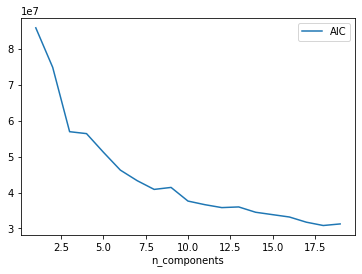

In [3]:
# gmm = GMM(3, covariance_type='diag').fit(train_data)

# # gmm = GMM(n_components=4).fit(train_data)
# labels = gmm.predict(train_data)
# plt.scatter(train_data[:, 0], train_data[:, 1], c=labels, s=40, cmap='viridis');


n_components = np.arange(1, 20)
models = [GMM(n, covariance_type='diag', random_state=0).fit(test_data)
          for n in n_components]

plt.plot(n_components, [m.aic(test_data) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

---
### **Section B**

Run EM to obtain a Gaussian Mixture on SPAMBASE dataset (should work).

Use a library/package (such as scikit-learn) and at first use the option that imposes a diagonal covariance matrix.

Sampling data might be necessary to complete the run

In [4]:
import numpy as np

def parse_data (infile, num_features) -> np.array :
  max_news_index = 0;

  infile = open(infile, "r")
  all_data = infile.read()
  lines = all_data.splitlines()

  X = []
  for line in lines:
    if line:
      datapoint_vector = []
      for f in range(num_features):
        val = line.split(',')[f]
        if (' ' in val):continue
        else:
          float_val = float(val)
          datapoint_vector.append(float_val)
      X.append(datapoint_vector)


  return np.array(X)


In [5]:
infile = '/content/drive/MyDrive/NEU ALIGN CS Masters/CS6220 Data Mining/Colab Notebooks/spambase.data'

train_data = parse_data(infile,57)
print(train_data.shape)

(4601, 57)


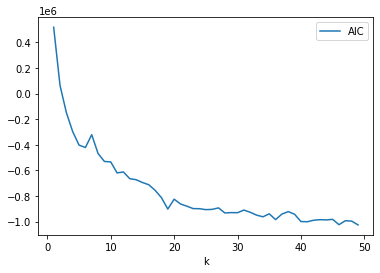

In [6]:
n_components = np.arange(1, 50)
models = [GMM(n, covariance_type='diag', random_state=0).fit(train_data)
          for n in n_components]

plt.plot(n_components, [m.aic(train_data) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('k');